In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras.models import load_model

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import google.colab
google.colab.auth.authenticate_user()

#authentication and establish connection
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/My Drive'

Mounted at /content/drive
 148.docx   BasedOnMaterial   ClassData		 Denomination   heart_disease_data.csv
 148.pdf    BasedOnPeriod    'Colab Notebooks'	 Edited.csv     models


In [ ]:
%cd /content/drive/MyDrive
os.listdir('/content/drive/MyDrive/Denomination')

/content/drive/MyDrive


['Radiate (antoninianus)', 'Nummus (AE 1 - AE 4)', 'Cut halfpenny', 'Penny']

/content/drive/MyDrive/Denomination/Penny/Penny83.jpg


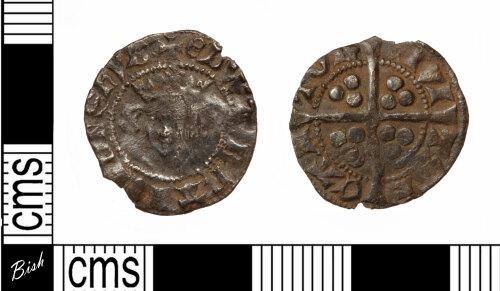

In [ ]:
import pathlib

data_dir_path = '/content/drive/MyDrive/Denomination'
data_dir = pathlib.Path(data_dir_path)

penny_images = list(data_dir.glob('Penny/*'))
print(penny_images[0])
PIL.Image.open(str(penny_images[0]))

/content/drive/MyDrive/Denomination/Nummus (AE 1 - AE 4)/Nummus82.jpg


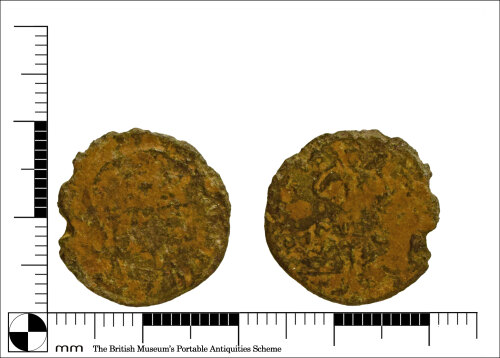

In [ ]:
nummus_images = list(data_dir.glob('Nummus (AE 1 - AE 4)/*'))
print(nummus_images[101])
PIL.Image.open(str(nummus_images[101]))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 515 files belonging to 4 classes.
Using 412 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 515 files belonging to 4 classes.
Using 103 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Cut halfpenny', 'Nummus (AE 1 - AE 4)', 'Penny', 'Radiate (antoninianus)']


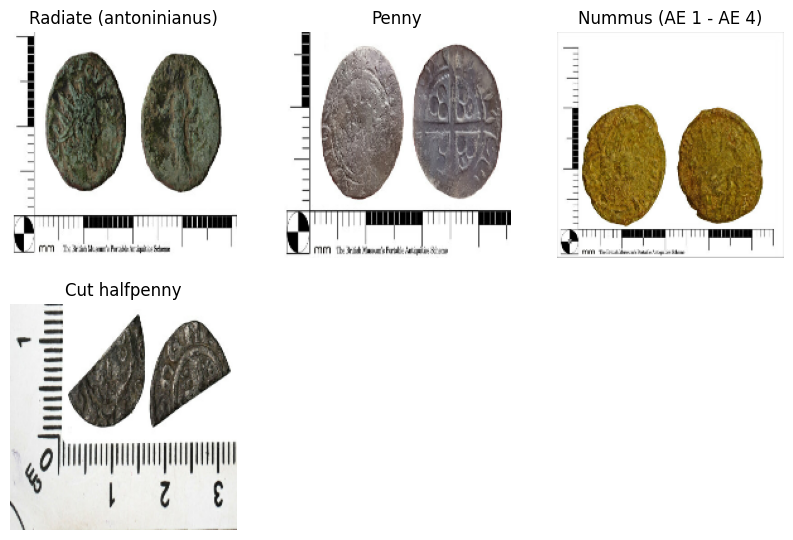

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
unique_labels = set()

for images, labels in train_ds.take(1):
    for i in range(len(images)):
        label = class_names[labels[i]]
        if label not in unique_labels:
            ax = plt.subplot(3, 3, len(unique_labels) + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(label)
            plt.axis("off")
            unique_labels.add(label)
            if len(unique_labels) == 9:
                break
plt.show()

In [ ]:
num_classes = 4
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 [==============================] - 41s 3s/step - loss: 2.0071 - accuracy: 0.2840 - val_loss: 1.3707 - val_accuracy: 0.2816
Epoch 2/10
13/13 [==============================] - 16s 1s/step - loss: 1.3256 - accuracy: 0.3252 - val_loss: 1.2882 - val_accuracy: 0.2913
Epoch 3/10
13/13 [==============================] - 16s 1s/step - loss: 1.1203 - accuracy: 0.5316 - val_loss: 1.0753 - val_accuracy: 0.6019
Epoch 4/10
13/13 [==============================] - 16s 1s/step - loss: 1.0014 - accuracy: 0.5850 - val_loss: 1.2056 - val_accuracy: 0.4563
Epoch 5/10
13/13 [==============================] - 16s 1s/step - loss: 0.8923 - accuracy: 0.6214 - val_loss: 0.9670 - val_accuracy: 0.6311
Epoch 6/10
13/13 [==============================] - 16s 1s/step - loss: 0.7123 - accuracy: 0.7330 - val_loss: 0.9211 - val_accuracy: 0.6602
Epoch 7/10
13/13 [==============================] - 16s 1s/step - loss: 0.6364 - accuracy: 0.7500 - val_loss: 1.1362 - val_accuracy: 0.5146
Epoch 8/10
13/13 [=============

In [ ]:
model.save(os.path.join('models','denomModel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
os.path.join('models','denomModel.h5')

'models/denomModel.h5'

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
model= load_model('/content/drive/MyDrive/models/denomModel.h5')
class_names = ['Cut halfpenny', 'Nummus (AE 1 - AE 4)', 'Penny', 'Radiate (antoninianus)']

In [ ]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(180, 180))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    return img_array

In [ ]:
def predict_image(image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]
    return class_names[predicted_class], confidence

In [ ]:
test_image_path = '/content/drive/MyDrive/Denomination/Nummus (AE 1 - AE 4)/Nummus106.jpg'

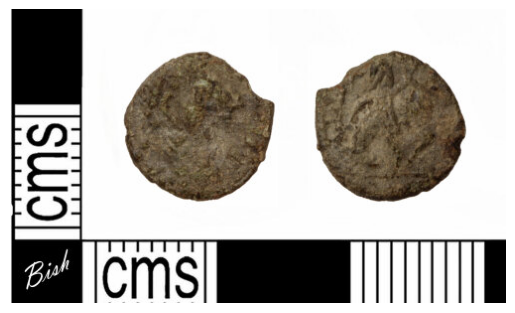

In [ ]:
test_image = PIL.Image.open(test_image_path)
plt.imshow(test_image)
plt.axis('off')
plt.show()

In [ ]:
predicted_class, confidence = predict_image(test_image_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence}")

1/1 [==============================] - 0s 126ms/step
Predicted Class: Nummus (AE 1 - AE 4), Confidence: 0.5293144583702087


In [ ]:
val_loss, val_accuracy = model.evaluate(train_ds)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

13/13 [==============================] - 12s 781ms/step - loss: 0.3311 - accuracy: 0.9005
